## Importing needed libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
from matplotlib import pyplot as plt

%matplotlib inline

## Reading data + Data Cleaning

In [39]:
df = pd.read_csv('mal_top2000_anime.csv', index_col=[0])

In [40]:
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?","['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Converting 'Air Date' column to datetime object and creating 'Release Year' column

In [41]:
df.insert(loc=6, column='Release Year', value=pd.to_datetime(df['Air Date'].str.split(' to ').str[0], format='mixed').dt.year)

In [42]:
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,"['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Inserting Release Month column

In [43]:
df.insert(loc=7, column='Release Month', value=pd.to_datetime(df['Air Date'].str.split(' to ').str[0], format='mixed').dt.month)

In [44]:
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Release Month,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,4,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,4,"['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,4,['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,4,['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",NaN
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,4,['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Replacing NaN floats in 'Demographic' to string 'Unknown' to properly gauge audience later on

In [45]:
df['Demographic'] = df['Demographic'].fillna(value='Unknown')

In [46]:
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Release Month,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,4,['Bones'],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,4,"['Wit Studio', ' CloverWorks']",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,4,['Wit Studio'],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,4,['White Fox'],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",Unknown
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,4,['Bandai Namco Pictures'],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Converting 'Studio' column to a list of strings instead of a single string that appears a list

In [47]:
df['Studio'] = df['Studio'].str.strip('[]')
df['Studio'] = df['Studio'].str.replace(' ', '')
df['Studio'] = df['Studio'].str.replace("\'", '')
df['Studio'] = df['Studio'].str.split(',')
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Release Month,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,4,[Bones],64,"['Action', 'Adventure', 'Drama', 'Fantasy']",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,4,"[WitStudio, CloverWorks]",12,"['Action', 'Comedy']",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,4,[WitStudio],10,"['Action', 'Drama']","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,4,[WhiteFox],24,"['Drama', 'Sci-Fi', 'Suspense']","['Psychological', 'Time Travel']",Unknown
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,4,[BandaiNamcoPictures],51,"['Action', 'Comedy', 'Sci-Fi']","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Converting 'Genres' column to a list of strings

In [48]:
df['Genres'] = df['Genres'].str.strip('[]')
df['Genres'] = df['Genres'].str.replace(' ', '')
df['Genres'] = df['Genres'].str.replace("\'", '')
df['Genres'] = df['Genres'].str.split(',')
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Release Month,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,4,[Bones],64,"[Action, Adventure, Drama, Fantasy]",['Military'],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,4,"[WitStudio, CloverWorks]",12,"[Action, Comedy]",['Childcare'],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,4,[WitStudio],10,"[Action, Drama]","['Gore', 'Military', 'Survival']",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,4,[WhiteFox],24,"[Drama, Sci-Fi, Suspense]","['Psychological', 'Time Travel']",Unknown
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,4,[BandaiNamcoPictures],51,"[Action, Comedy, Sci-Fi]","['Gag Humor', 'Historical', 'Parody', 'Samurai']",Shounen


### Converting 'Themes' column to a single string

In [49]:
df['Theme(s)'] = df['Theme(s)'].str.strip('[]')
df['Theme(s)'] = df['Theme(s)'].str.replace(' ', '')
df['Theme(s)'] = df['Theme(s)'].str.replace("\'", '')
df['Theme(s)'] = df['Theme(s)'].str.split(',')
df.head()

,Name,Type,Score,Score Rank,Popularity Rank,Air Date,Release Year,Release Month,Studio,Num. of episodes,Genres,Theme(s),Demographic
0,Fullmetal Alchemist: Brotherhood,TV,9.14,1,3,"Apr 5, 2009 to Jul 4, 2010",2009,4,[Bones],64,"[Action, Adventure, Drama, Fantasy]",[Military],Shounen
1,Spy x Family,TV,9.09,2,350,"Apr 9, 2022 to ?",2022,4,"[WitStudio, CloverWorks]",12,"[Action, Comedy]",[Childcare],Shounen
2,Shingeki no Kyojin Season 3 Part 2,TV,9.08,3,32,"Apr 29, 2019 to Jul 1, 2019",2019,4,[WitStudio],10,"[Action, Drama]","[Gore, Military, Survival]",Shounen
3,Steins;Gate,TV,9.08,4,13,"Apr 6, 2011 to Sep 14, 2011",2011,4,[WhiteFox],24,"[Drama, Sci-Fi, Suspense]","[Psychological, TimeTravel]",Unknown
4,Gintama°,TV,9.08,5,335,"Apr 8, 2015 to Mar 30, 2016",2015,4,[BandaiNamcoPictures],51,"[Action, Comedy, Sci-Fi]","[GagHumor, Historical, Parody, Samurai]",Shounen


## Data Analysis

### How has the number of anime produced per year changed over time?
With the rise of streaming platforms such as Netflix and Crunchyroll, viewers have constant access to a plethora of anime to choose from. Intuitively, the amount of animes produced should have increased significantly over time. Let's find out by grouping by year so we can find the amount of anime within the MAL Top 2000 released each year

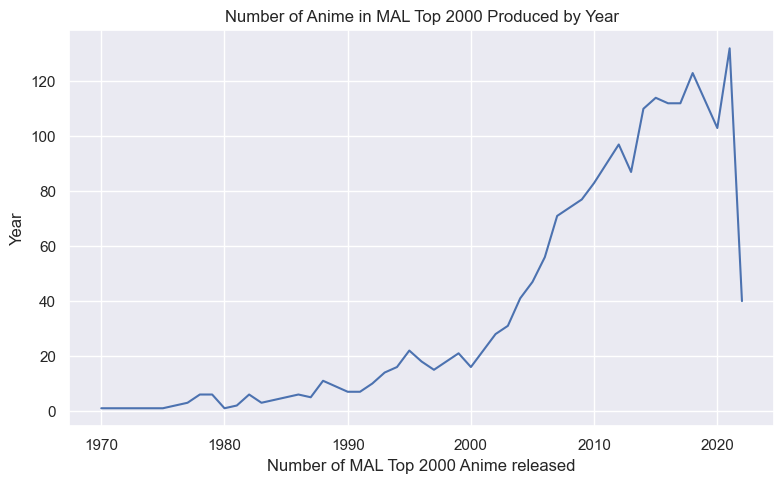

In [50]:
year_grp = df.groupby('Release Year')
years_in_order = np.sort(pd.unique(df['Release Year']))
# pd.unique gets unique release year values

years = []
year_counts = []

for year in years_in_order:
    years.append(year)
    year_counts.append(len(year_grp.get_group(year)))
    
plt.style.use('fast')
plt.plot(years, year_counts)
plt.xlabel('Number of MAL Top 2000 Anime released')
plt.ylabel('Year')
plt.title('Number of Anime in MAL Top 2000 Produced by Year')
plt.tight_layout()
plt.show()

After seeing this data, we might be interested in the number of types of anime formats released per year. If we take a look at our dataframe, we can see that there are different types of anime, such as TV, OVA, etc:

In [51]:
pd.unique(df['Type'])

array(['TV', 'Movie', 'OVA', 'ONA', 'Special', 'Music'], dtype=object)

We then group by year and then show type to see how many of each show type were released over the years

Text(0, 0.5, '# of Anime Produced')

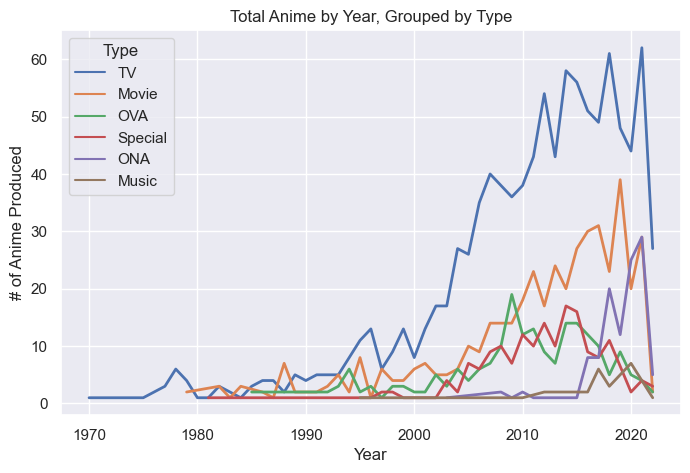

In [52]:
by_year_and_type = df.groupby(by=['Release Year', 'Type'], as_index=False).size()
# creates an underlying dataframe

# the x and y arguments of lineplot should be columns within this generated dataframe
ax = sns.lineplot(data=by_year_and_type, x='Release Year', y='size', hue="Type",
                  hue_order=["TV", "Movie", "OVA", "Special", "ONA", "Music"], linewidth=2)
plt.rcParams["figure.figsize"] = (8,5)
ax.set_title('Total Anime by Year, Grouped by Type')
ax.set_xlabel('Year')
ax.set_ylabel('# of Anime Produced')

The reason for the increase in production over the years can be partially attributed to the advances in technology; with panels being drawn on digital software and the increase in population, which leads to more workers, suddenly it has become easier (relatively speaking) for animation studios to pump out more anime than in previous years. This might incentivize streaming platforms such as Netflix, who are not anime exclusive platforms like Crunchyroll, to take on more anime shows to retain paying customers by offering them more variety and offering them the luxury of not having to pay for another service. For the same reason it might also draw in new customers.

### Which release month had the greatest popularity?

Text(0, 0.5, 'Avg. popularity rank')

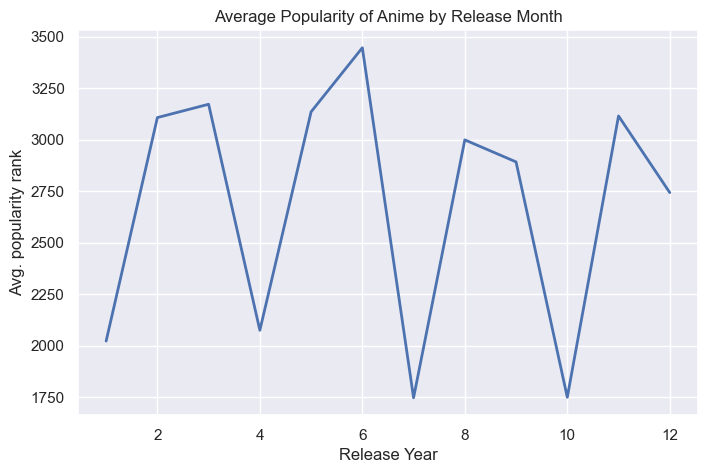

In [53]:
popularity_by_releaseMonth = df.groupby(by=['Release Month'], as_index=False)['Popularity Rank'].mean()
ax = sns.lineplot(data=popularity_by_releaseMonth, x='Release Month', y='Popularity Rank', linewidth=2)
ax.set_title('Average Popularity of Anime by Release Month')
plt.rcParams["figure.figsize"] = (8,5)
ax.set_xlabel('Release Year')
ax.set_ylabel('Avg. popularity rank')

From the graph, anime that have been released during the months of January, April, July, and October seem to do particularly well. (Lower popularity is considered better in this case). As to why this might be the case, we can draw a few inferences. For example, in July, school is out for almost everyone, so the amount of viewers tuning into the first few episodes is very high compared to say, November, where a lot viewers are occupied with academics.    

Anime also tends to be released weekly if is a TV series, typically for around either 12 or 24 episodes. This ensures that from start to finish an anime would run for either 3 or 6 months. So, if animes release in say any of January, April, July, or October, the end of one anime leads right into the start of another anticipated anime.  

Recently, we have seen multiple anticipated/hyped animes follow this trend, such as Chainsaw Man (released Oct 2022), Vinland Saga S2 (released Jan 2023), Blue Lock (released Oct 2022), and Jujutsu Kaisen (set to release Jul 2023), and Bleach: Thousand Year Blood War Part 2 - The Separation (set to release July 2023)

### What is the most common target demographic among top scoring anime?

We find the different genres and how often they occur in the top 2000:

In [54]:
top20_demographics = df.head(20).groupby(by=['Demographic'], as_index=False).size()
top20_demographics

,Demographic,size
0,Seinen,2
1,Shoujo,1
2,Shounen,12
3,Unknown,5


Text(0, 0.5, '# appearances')

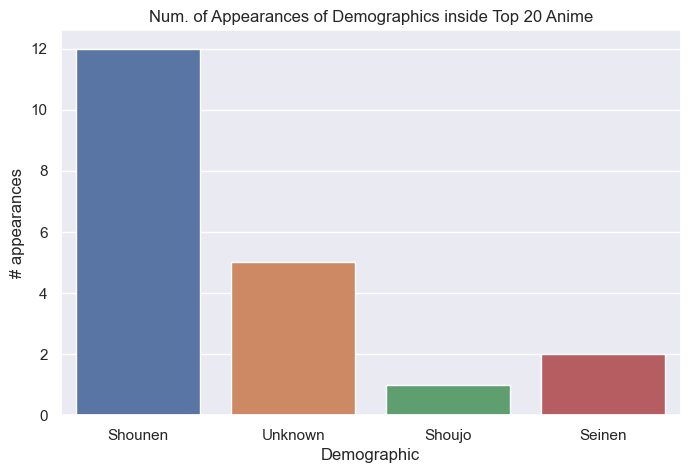

In [55]:
ax = sns.countplot(x=df.head(20)['Demographic'])
ax.set_title('Num. of Appearances of Demographics inside Top 20 Anime')
plt.rcParams["figure.figsize"] = (8,5)
ax.set_ylabel('# appearances')

The most targeted genre in the top 20 is by far Shounen, which translates to "young male" (typically 15 years of age or younger). However, perhaps we would like to explore why Shounen is the most frequently occurring genre in the top 20. To do that, we might look at the stories told within these anime by looking at their themes:

### Do certain themes tend to score higher than others?

In [56]:
themes = Counter()
for row in df.head(20)['Theme(s)']:
    themes.update(row)
themes.most_common(5)

[('GagHumor', 7),
 ('Historical', 7),
 ('Parody', 7),
 ('Samurai', 7),
 ('Military', 4)]

Taking a look at the 5 most common themes among the top 20 anime, we get themes such as GagHumour, Historical, Parody, Samurai, and Military. With shounen anime, there tends to be emotional and inspirational storytelling, with an emphasis on overcoming adversity/loss, bonding, resolve, and never giving up on one's ambitions, with themes such as Historical, Samurai, and Military being perfect drawing boards for these overarching messages. These viewers might see a reflection of their former or current selves in a character, or strive to be like one, and seeing how said character keeps pushing forward sparks a sense of inspiration and admiration inside the viewer, leaving a positive impact.